<a href="https://colab.research.google.com/github/VortexQuatro/Hell-World/blob/main/C%C3%B3pia_de_Exerc%C3%ADcio_1_Ver%C3%A3o_1_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição
O conjunto de dados Iris foi usado no artigo clássico de 1936 de RA Fisher, The Use of Multiple Measurements in Taxonomic Problems , e também pode ser encontrado no UCI Machine Learning Repository .

Inclui três espécies de íris com 50 amostras cada, bem como algumas propriedades sobre cada flor. Uma espécie de flor é linearmente separável das outras duas, mas as outras duas não são linearmente separáveis ​​uma da outra.

As colunas neste conjunto de dados são:

Identidade
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Espécies

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
# Apresentação de histograma no ambiente Notebook Colaboratory
%matplotlib inline

In [ ]:
 dataset = pd.read_csv('/content/drive/MyDrive/Iris.csv') 

In [ ]:
dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Verificando uma descrição das distribuções do dataset
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Verificando as dimensões do dataset 
dataset.shape

(150, 6)

In [ ]:
# Identificando os tipos dos atributos do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Removendo o atributo "Id", pois trata-se de uma chave primária do registro
dataset.drop(['Id'], axis = 1, inplace = True) 

# Processando a limpeza da base de dados
1) Removendo atributos indesejados (por exemplo, índices de registros);

2) Verificando a existência de dados expúrios;

3) Verificando a existência de dados faltantes

In [ ]:
# Consultando atributos com valores faltantes 
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Removendo registros com dados faltantes em todos os atributos
dataset.dropna(how = 'all', inplace = True)

In [ ]:
# Preenchendo os dados faltantes dos atributos com o valor médio dos atributos
dataset['SepalLengthCm'].fillna(dataset['SepalLengthCm'].mean(), inplace = True)
dataset['SepalWidthCm'].fillna(dataset['SepalWidthCm'].mean(), inplace = True)
dataset['PetalLengthCm'].fillna(dataset['PetalLengthCm'].mean(), inplace = True)
dataset['PetalWidthCm'].fillna(dataset['PetalWidthCm'].mean(), inplace = True)

# Eliminando dados anômalos (discrepantes, prováveis *outlyers*)

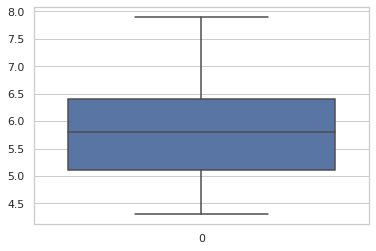

In [ ]:
# Visualizando dados anômalos
sns.set(style = "whitegrid", color_codes = True)
sns.boxplot(data = np.array(dataset['SepalLengthCm']))

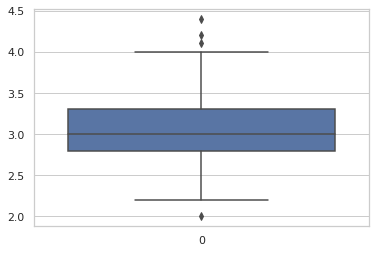

In [ ]:
# Visualizando dados anômalos
sns.set(style = "whitegrid", color_codes = True)
sns.boxplot(data = np.array(dataset['SepalWidthCm']))

## Eliminando *otlyers*

In [ ]:
# Definindo os limites inferior e superior dos dados a serem considerados
Q1 = np.quantile(dataset['SepalWidthCm'], 0.25)
Q3 = np.quantile(dataset['SepalWidthCm'], 0.75)
DeltaQ = Q3 - Q1
LimInferior = Q1 - 1.5 * DeltaQ
LimSuperior = Q3 + 1.5 * DeltaQ

In [ ]:
# Eliminando as linhas cujas colunas apresentam dados discrepantes
dataset.drop(dataset[(dataset.SepalLengthCm < LimInferior) & (dataset.SepalLengthCm < LimSuperior)].index, inplace = True)

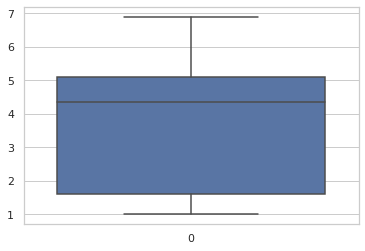

In [ ]:
# Visualizando dados anômalos
sns.set(style = "whitegrid", color_codes = True)
sns.boxplot(data = np.array(dataset['PetalLengthCm']))

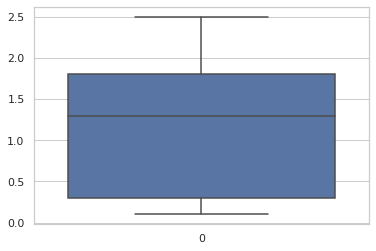

In [ ]:
# Visualizando dados anômalos
sns.set(style = "whitegrid", color_codes = True)
sns.boxplot(data = np.array(dataset['PetalWidthCm']))

# Analisando o desbalanceamento da base de dados

In [ ]:
# Verificando possíveis desbalanceamento entre os atributos de classificação
pd.value_counts(dataset['Species'])

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Convertendo o atributo de classificação "Species" em valor numérico

In [ ]:
######## Como converter um atributo categórico em numérico????

In [ ]:
#dataset['Species'].astype('float64')

# Verificando a "normalidade" da distribução dos valores dos atributos da base de dados


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


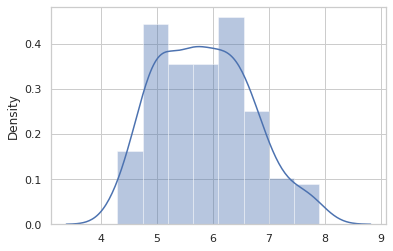

In [ ]:
sns.distplot(np.array(dataset['SepalLengthCm']).reshape(-1))
plt.show()

In [ ]:
x = np.array(np.array(dataset['SepalLengthCm']).reshape(-1,1)) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset['SepalLengthCm'] = x_scaled

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


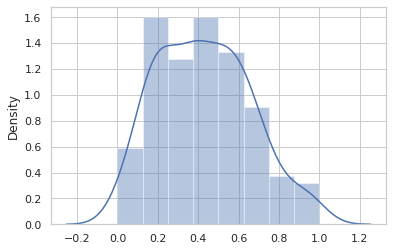

In [ ]:
sns.distplot(np.array(dataset['SepalLengthCm']).reshape(-1))
plt.show()

# Como normalizar uma distribuição

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


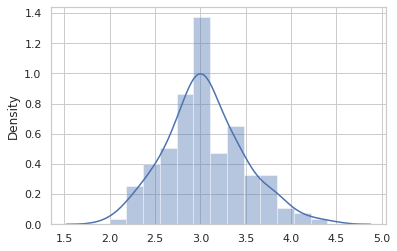

In [ ]:
sns.distplot(np.array(dataset['SepalWidthCm']).reshape(-1))
plt.show()

In [ ]:
x = np.array(np.array(dataset['SepalWidthCm']).reshape(-1,1)) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset['SepalWidthCm'] = x_scaled

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


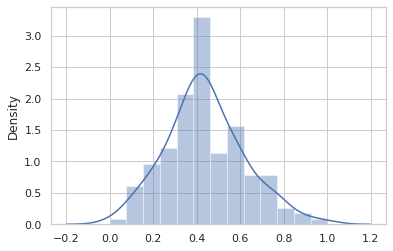

In [ ]:
sns.distplot(np.array(dataset['SepalWidthCm']).reshape(-1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


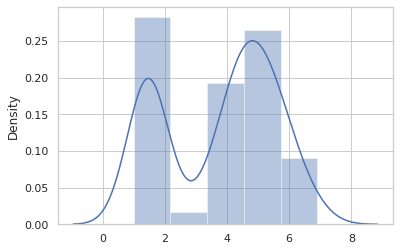

In [ ]:
sns.distplot(np.array(dataset['PetalLengthCm']).reshape(-1))
plt.show()

In [ ]:
x = np.array(np.array(dataset['PetalLengthCm']).reshape(-1,1)) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset['PetalLengthCm'] = x_scaled

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


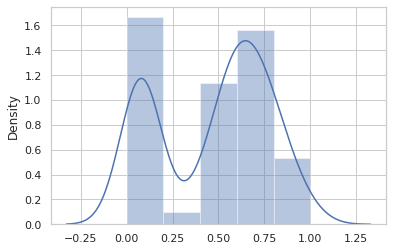

In [ ]:
sns.distplot(np.array(dataset['PetalLengthCm']).reshape(-1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


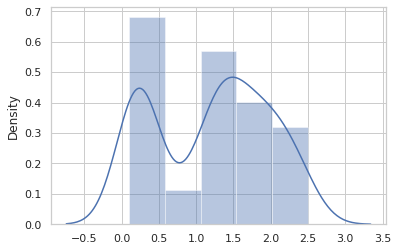

In [ ]:
sns.distplot(np.array(dataset['PetalWidthCm']).reshape(-1))
plt.show()

In [ ]:
x = np.array(np.array(dataset['PetalWidthCm']).reshape(-1,1)) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataset['PetalWidthCm'] = x_scaled

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


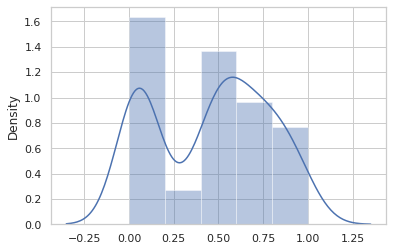

In [ ]:
sns.distplot(np.array(dataset['PetalWidthCm']).reshape(-1))
plt.show()

In [ ]:
dataset.tail(10)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,0.666667,0.458333,0.779661,0.958333,Iris-virginica
141,0.722222,0.458333,0.694915,0.916667,Iris-virginica
142,0.416667,0.291667,0.694915,0.750000,Iris-virginica
143,0.694444,0.500000,0.830508,0.916667,Iris-virginica
144,0.666667,0.541667,0.796610,1.000000,Iris-virginica
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica
149,0.444444,0.416667,0.694915,0.708333,Iris-virginica


# Verificação do grau de correlação entre os atributos da base de dados 

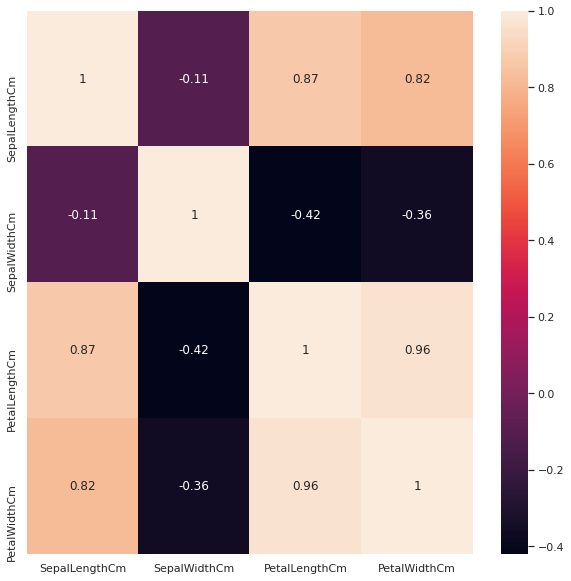

In [ ]:
fig, ax = plt.subplots(figsize =(10,10))
ax = sns.heatmap(dataset.corr(), annot = True)

# Avaliação dos algoritmos de classificação

In [ ]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica


In [ ]:
# Atributos de classificação
X = dataset.iloc[:,0:4].values
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
# Classes
y = dataset.iloc[:, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
# Importação de algoritmos para classificação e medidas de acurácia
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
resultados_naive_bayes = []
resultados_logistica = []
resultados_forest = []
# Execução de 30 testes para cada algoritmo, separando 20% dos dados para testes,
# estratificando por classe (separando proporcionalmente de acordo com as classes) e
# gerando amostras fixas para cada valor de i.
for i in range(30):
  X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, 
                                                                    stratify = y, random_state = i)

  naive_bayes = GaussianNB()
  naive_bayes.fit(X_treinamento, y_treinamento)
  resultados_naive_bayes.append(accuracy_score(y_teste, naive_bayes.predict(X_teste))) 

  logistica = LogisticRegression(max_iter=200)
  logistica.fit(X_treinamento, y_treinamento)
  resultados_logistica.append(accuracy_score(y_teste, logistica.predict(X_teste)))

  random_forest = RandomForestClassifier()
  random_forest.fit(X_treinamento, y_treinamento)
  resultados_forest.append(accuracy_score(y_teste, random_forest.predict(X_teste)))  



In [ ]:
# Apresentação dos 30 resultados por algoritmo
print(resultados_naive_bayes) 

[0.9666666666666667, 0.9666666666666667, 1.0, 0.9, 1.0, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9666666666666667]


In [ ]:
# Apresentação dos 30 resultados por algoritmo
print(resultados_logistica)

[0.9, 0.9333333333333333, 1.0, 0.8, 0.9666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 0.8666666666666667, 0.9, 1.0, 1.0, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9, 0.9666666666666667, 0.9666666666666667, 0.9, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 0.9333333333333333, 0.8333333333333334, 0.9, 0.9]


In [ ]:
# Apresentação dos 30 resultados por algoritmo
print(resultados_forest)

[0.9333333333333333, 0.9666666666666667, 1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9, 1.0, 0.9333333333333333, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.8666666666666667, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9666666666666667]


# Cálculo de Média, Moda, Mediana, Variância, Desvio Padrão e Coeficiente de Variação

In [ ]:
# Convertendo o tipo "list" para "array"
resultados_naive_bayes = np.array(resultados_naive_bayes)
resultados_logistica = np.array(resultados_logistica)
resultados_forest = np.array(resultados_forest)

In [ ]:
# Calculando a Média  
resultados_naive_bayes.mean(), resultados_logistica.mean(), resultados_forest.mean()

(0.9588888888888889, 0.9222222222222222, 0.9577777777777776)

In [ ]:
# Calculando a Moda  
stats.mode(resultados_naive_bayes), stats.mode(resultados_logistica), stats.mode(resultados_forest)

(ModeResult(mode=array([1.]), count=array([10])),
 ModeResult(mode=array([0.9]), count=array([10])),
 ModeResult(mode=array([0.96666667]), count=array([9])))

In [ ]:
# Calculando a Mediana
np.median(resultados_naive_bayes), np.median(resultados_logistica), np.median(resultados_forest)


(0.9666666666666667, 0.9166666666666667, 0.9666666666666667)

In [ ]:
# Calculando a Variância
np.var(resultados_naive_bayes), np.var(resultados_logistica), np.var(resultados_forest)

(0.0014580246913580243, 0.0023209876543209876, 0.0013283950617283943)

In [ ]:
# Calculando o Desvio Padrão
np.std(resultados_naive_bayes), np.std(resultados_logistica), np.std(resultados_forest)

(0.03818408950542129, 0.048176629752619556, 0.03644715437079271)

In [ ]:
# Calculando o Coeficiente de Variação
stats.variation(resultados_naive_bayes)*100, stats.variation(resultados_logistica)*100, stats.variation(resultados_forest)*100

(3.982118256648802, 5.223971900886458, 3.8053873472985438)

# Avaliação de algoritmos empregando validação cruzada (k-folds)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

resultados_naive_bayes_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []

for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)

  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, X, y, cv = kfold)
  resultados_naive_bayes_cv.append(scores.mean()) 

  logistica = LogisticRegression(max_iter=200)
  scores = cross_val_score(logistica, X, y, cv = kfold)
  resultados_logistica_cv.append(scores.mean()) 

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest_cv.append(scores.mean()) 

In [ ]:
print(resultados_naive_bayes_cv)

[0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9600000000000002, 0.9533333333333334, 0.9533333333333334, 0.9533333333333335, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9533333333333335, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [ ]:
print(resultados_logistica_cv)

[0.9133333333333334, 0.9266666666666667, 0.9266666666666667, 0.9266666666666667, 0.9333333333333333, 0.9266666666666667, 0.9266666666666667, 0.9333333333333333, 0.9266666666666667, 0.9266666666666667, 0.9266666666666667, 0.9266666666666667, 0.9333333333333333, 0.9199999999999999, 0.9266666666666665, 0.9266666666666667, 0.9199999999999999, 0.9266666666666667, 0.9333333333333333, 0.9266666666666665, 0.9199999999999999, 0.9333333333333333, 0.9200000000000002, 0.9400000000000001, 0.9266666666666667, 0.9266666666666665, 0.9133333333333333, 0.9200000000000002, 0.9333333333333332, 0.9266666666666667]


In [ ]:
print(resultados_forest_cv)

[0.9533333333333334, 0.9466666666666667, 0.96, 0.9533333333333335, 0.96, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333335, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.96, 0.9466666666666667, 0.9533333333333335, 0.9533333333333334, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9600000000000002, 0.96, 0.9466666666666667, 0.96]


In [ ]:
stats.variation(resultados_naive_bayes)*100, stats.variation(resultados_logistica)*100, stats.variation(resultados_forest)*100


(3.982118256648802, 5.223971900886458, 3.8053873472985438)

In [ ]:
stats.variation(resultados_naive_bayes_cv)*100, stats.variation(resultados_logistica_cv)*100, stats.variation(resultados_forest_cv)*100


(0.27698488656491826, 0.6296188413723517, 0.5416759924765613)